<a href="https://colab.research.google.com/github/Shiksha-Yadav/WOC/blob/main/Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean squared error for testing values: 114980.3728023014


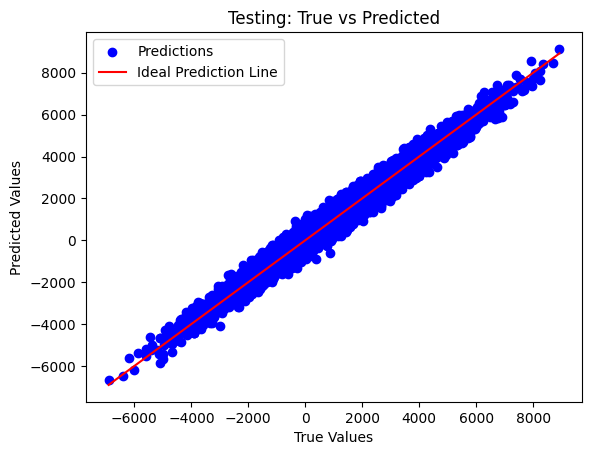

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset
def data(dataset):
  df= pd.read_csv(dataset)
  return df

# normalization of dataset to ensure equal contribution of each feature
def normalizationx(df, min=None, max=None):
  min = df.min() if min is None else min
  max = df.max() if max is None else max
  norm_df= (df-min)/(max-min)
  return norm_df, min, max

def normalizationy(df, min=None, max=None):
  min = df.min() if min is None else min
  max = df.max() if max is None else max
  norm_df= (df-min)/(max-min)
  return norm_df, min, max

# denormalize to get values for test dataset
def denorm(normal_df, max, min):
  return (normal_df*(max-min) + min)

# separate training and testing data
def matrix(df):
  x= df.iloc[1:,1:-1].values # all columns (features) except the last one (target)
  y= df.iloc[1:, -1].values # last column (target)
  test_size= 0.2 # what amount of the whole dataset is used for testing
  rows= x.shape[0] # number of rows
  index= np.random.permutation(rows) # shuffle index
  test_size= int(rows*test_size)
  train_size= rows-test_size
  train_index= index[:train_size]
  test_index= index[train_size:]
  x_train, x_test= x[train_index], x[test_index] # training and testing features
  y_train, y_test= y[train_index], y[test_index] # training and testing target
  return x_train, x_test, y_train, y_test

# calculating coefficients of equation using Normal Equation: (X.T * X)^-1 * X.T * y
def coefficient(x,y):
  x = np.c_[np.ones(x.shape[0]), x] # making adequate rows and columns for matrix multiplication
  coefficients= np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
  return coefficients

# predict target values using  Y= XQ , where Q is coefficient matrix
def predict(x,coefficients):
  x=np.c_[np.ones(x.shape[0]),x] # making adequate rows and columns for matrix multiplication
  y_calc= x.dot(coefficients)
  return y_calc

# calculate mean squared error of predicted target values
def mean_sq_error(y_true, y_cal):
  error= np.mean((y_true - y_cal) ** 2 )
  return error

# plot the graph to compare the true and predicted target values
def plot(y_true, y_pred, title="Prediction vs True Values"):
    plt.scatter(y_true, y_pred, color='blue', label='Predictions')  # Scatter plot of true vs predicted
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', label='Ideal Prediction Line')  # Ideal line (y=x)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.legend()
    plt.show()

def plot_y_vs_x_with_ideal_curve(x, y, title="y vs x with Data Points"):
    plt.scatter(x, y, color='blue', label='Data Points')  # Scatter plot of y vs x
    plt.xlabel('Feature (x)')
    plt.ylabel('Target (y)')
    plt.title(title)
    plt.legend()
    plt.show()

# main function
if __name__ == "__main__":
  dataset = "linear_regression_train1.csv"
  df1= data(dataset) # dataset
  x_train, x_test, y_train, y_test= matrix(df1)
  x_train_norm, min_x, max_x= normalizationx(x_train)
  x_test_norm, _, _= normalizationx(x_test, min_x, max_x)
  y_train_norm, min_y, max_y= normalizationy(y_train)
  y_test_norm, _, _= normalizationy(y_test, min_y, max_y)
  coefficients= coefficient(x_train_norm, y_train_norm) # coefficient matrix
  y_predict_train= denorm(predict(x_train_norm, coefficients), max_y, min_y)
  y_predict_test= denorm(predict(x_test_norm, coefficients), max_y, min_y)
  mse_train= mean_sq_error(y_train, y_predict_train)
  mse_test= mean_sq_error(y_test, y_predict_test)
  #print(f"Mean squared error for training values: {mse_train}")
  print(f"Mean squared error for testing values: {mse_test}")
  #plot(y_train, y_predict_train, title="Training: True vs Predicted")
  plot(y_test, y_predict_test, title="Testing: True vs Predicted")

In [ ]:
df_testdataset= data('linear_regression_test1.csv')
test_ = df_testdataset.iloc[1:,1:].values
x_test1, _, _=normalizationx(test_, min_x, max_x)
y_predict_test = predict(x_test1, coefficients)
y_test_denormed = denorm(y_predict_test, max_y, min_y)
print(y_test_denormed)

[ 4490.87806306  4055.82922511 -1313.45845305 ...  4958.18356303
  -257.82874317   531.13285414]
